In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/admissions.csv')
df.head(3)

,family_income,gpa,parent_avg_age
0,31402.0,3.18,32
1,32247.0,2.98,48
2,34732.0,2.85,61


In [3]:
def covariance(x1, x2):
    return np.sum((x1 - np.mean(x1)) * (x2 - np.mean(x2))) / (len(x1) - 1.)

print(covariance(df.family_income, df.gpa))
print(covariance(df.family_income, df.parent_avg_age))
print(covariance(df.gpa, df.parent_avg_age))

#Check your results
df.cov()

4015.2990850274873
-1226.3262797340344
-0.028785259926177507


,family_income,gpa,parent_avg_age
family_income,3.329410e+08,4015.299085,-1226.326280
gpa,4.015299e+03,0.087891,-0.028785
parent_avg_age,-1.226326e+03,-0.028785,112.977442


In [4]:
def correlation(x1, x2):
    std_prod = np.std(x1) * np.std(x2)
    covar = covariance(x1, x2)
    return covar / std_prod

print(correlation(df.family_income, df.gpa))
print(correlation(df.family_income, df.parent_avg_age))
print(correlation(df.gpa, df.parent_avg_age))

#Check your results
df.corr()

0.7423369244946536
-0.0063236235651676735
-0.009135685085790381


,family_income,gpa,parent_avg_age
family_income,1.000000,0.742269,-0.006323
gpa,0.742269,1.000000,-0.009135
parent_avg_age,-0.006323,-0.009135,1.000000


In [5]:
# Categorize the family income
def income_category(income):
    if income <= 26832:
        return 'low'
    elif income <= 37510:
        return 'medium'
    else:
        return 'high'
# Apply the categorization and define a new column 
df['family_income_cat'] = df.family_income.apply(income_category)

In [6]:
df.head(3)

,family_income,gpa,parent_avg_age,family_income_cat
0,31402.0,3.18,32,medium
1,32247.0,2.98,48,medium
2,34732.0,2.85,61,medium


In [8]:
df.family_income_cat.value_counts()

high      5496
medium    2748
low       2748
Name: family_income_cat, dtype: int64

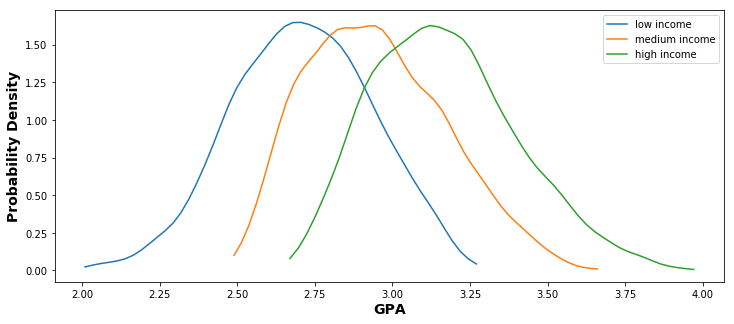

In [13]:
# Get the conditional distribution of GPA given an income class
low_income_gpa = df[df['family_income_cat'] == 'low'].gpa
medium_income_gpa = df[df['family_income_cat'] == 'medium'].gpa
high_income_gpa = df[df['family_income_cat'] == 'high'].gpa

# Plot the distributions
from scipy.stats.kde import gaussian_kde
def plot_smooth(gpa_samp, label):
    my_pdf = gaussian_kde(gpa_samp)
    x = np.linspace(min(gpa_samp) , max(gpa_samp))
    plt.plot(x, my_pdf(x), label=label)
 
fig = plt.figure(figsize=(12, 5))
plot_smooth(low_income_gpa, 'low income')
plot_smooth(medium_income_gpa, 'medium income')
plot_smooth(high_income_gpa, 'high income')
plt.xlabel('GPA', fontsize=14, fontweight='bold')
plt.ylabel('Probability Density', fontsize=14, fontweight='bold')
plt.legend();

In [15]:
# The 90th percentile GPA for each class
print('90th percentile GPA for low income class', np.percentile(low_income_gpa, 90))
print('90th percentile GPA for medium income class', np.percentile(medium_income_gpa, 90))
print('90th percentile GPA for high income class', np.percentile(high_income_gpa, 90))

90th percentile GPA for low income class 3.01
90th percentile GPA for medium income class 3.26
90th percentile GPA for high income class 3.49
